In [1]:
# -*- coding: utf-8 -*-
#
# 混合ベルヌーイ分布による手書き文字分類
#
# 2015/04/24 ver1.0
# 2019/09/08 ver1.1 Python2->3に関するFuture Warningに対処 ix -> iloc など
#

import numpy as np
import matplotlib.pyplot as plt
#意地でもjupyter notebookで逐次描画を行いたい->必要なかった
# import matplotlib.animation
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randint, rand
# jupyter notebookで図を表示したいので
%matplotlib inline 

In [2]:
#------------#
# Parameters #
#------------#
K = 3   # 分類する文字数
N = 10  # 反復回数

In [3]:
# 分類結果の表示
def show_figure(mu, cls):
    fig = plt.figure()
    for c in range(K):
        subplot = fig.add_subplot(K,7,c*7+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('Master')
        subplot.imshow(mu[c].reshape(28,28), cmap=plt.cm.gray_r)
        i = 1
        for j in range(len(cls)):
            if cls[j] == c:
#                 print(df.shape)
                subplot = fig.add_subplot(K,7,c*7+i+1)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.imshow(df.iloc[j].values.reshape(28,28), cmap=plt.cm.gray_r)
                i += 1
                if i > 6:
                    break
    plt.show()

In [4]:
# ベルヌーイ分布
def bern(x, mu):
    r = 1.0
    for x_i, mu_i in zip(x, mu):
        if x_i == 1:
            r *= mu_i
        else:
            r *= (1.0 - mu_i)
    return r

iter_num 0
iter_num 1
iter_num 2
iter_num 3
iter_num 4
iter_num 5
iter_num 6
iter_num 7
iter_num 8
iter_num 9


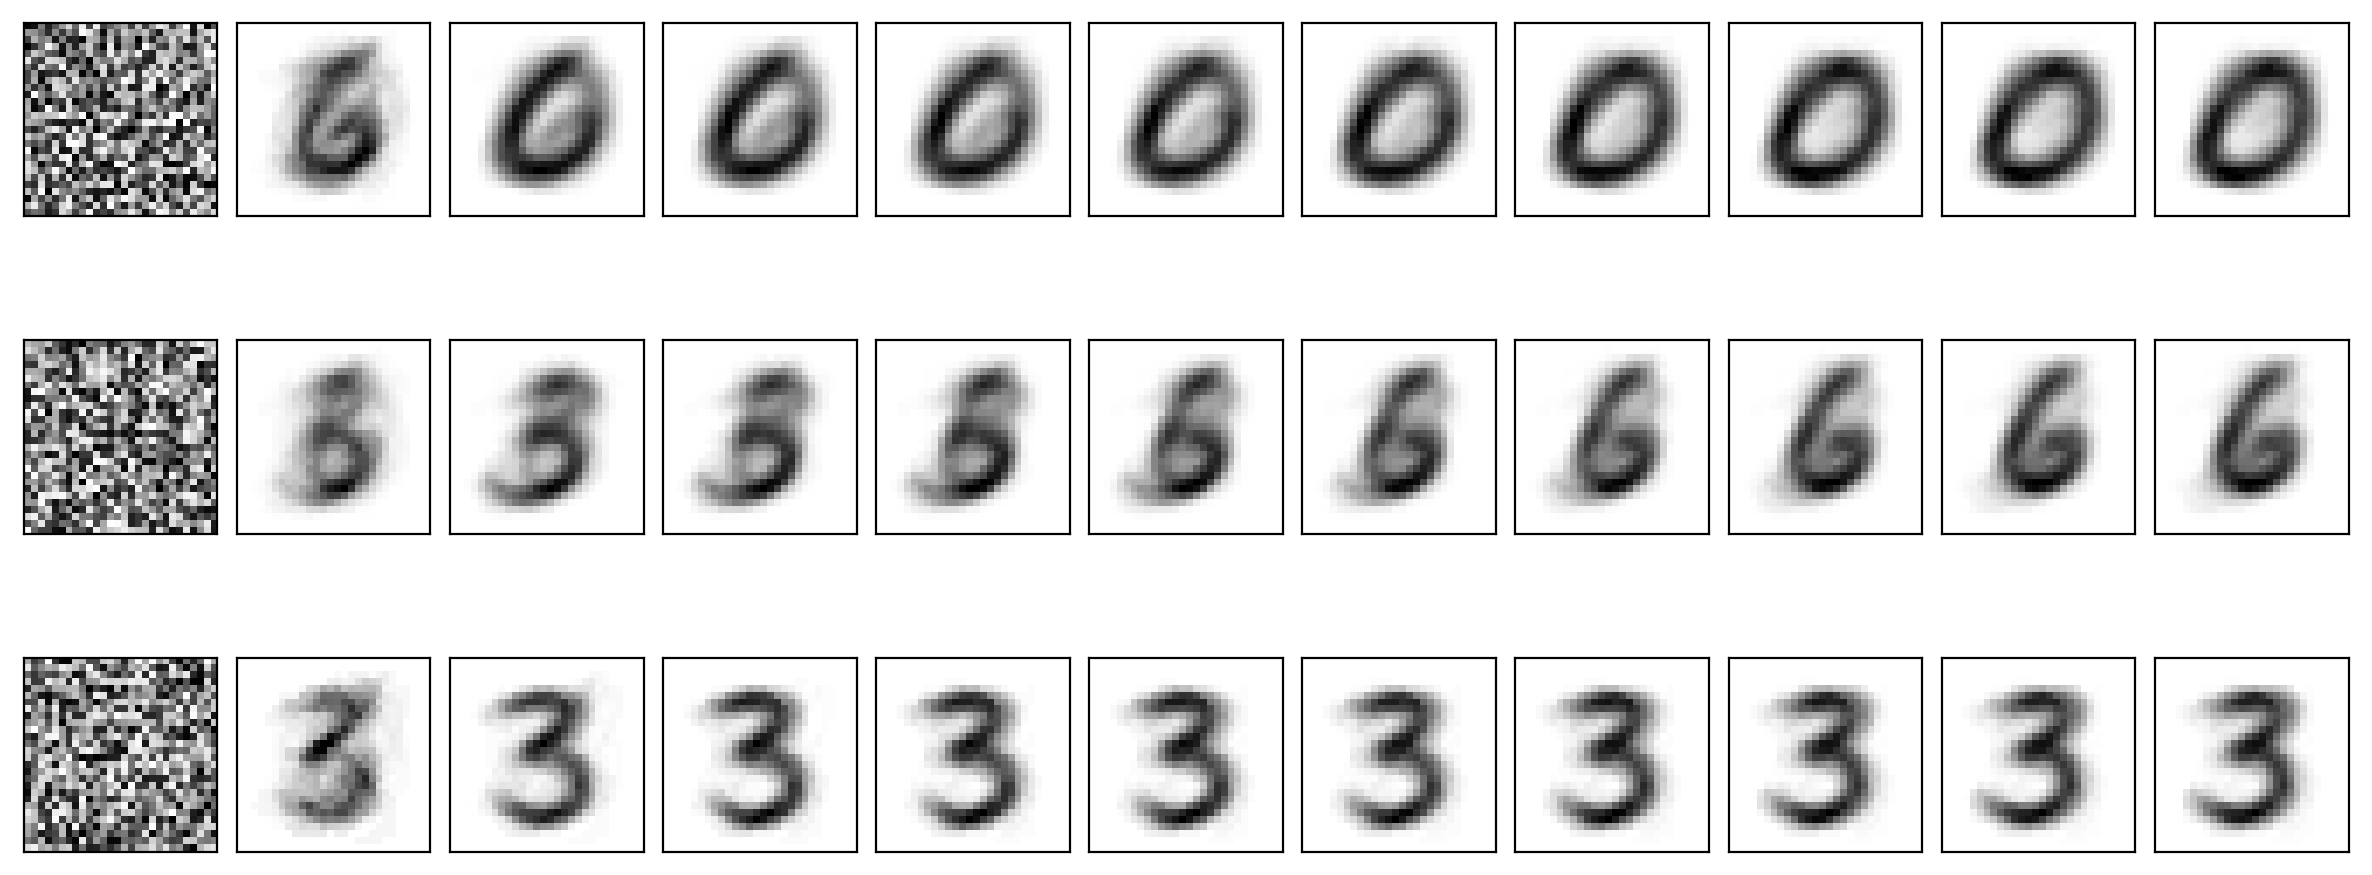

/Users/saita/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


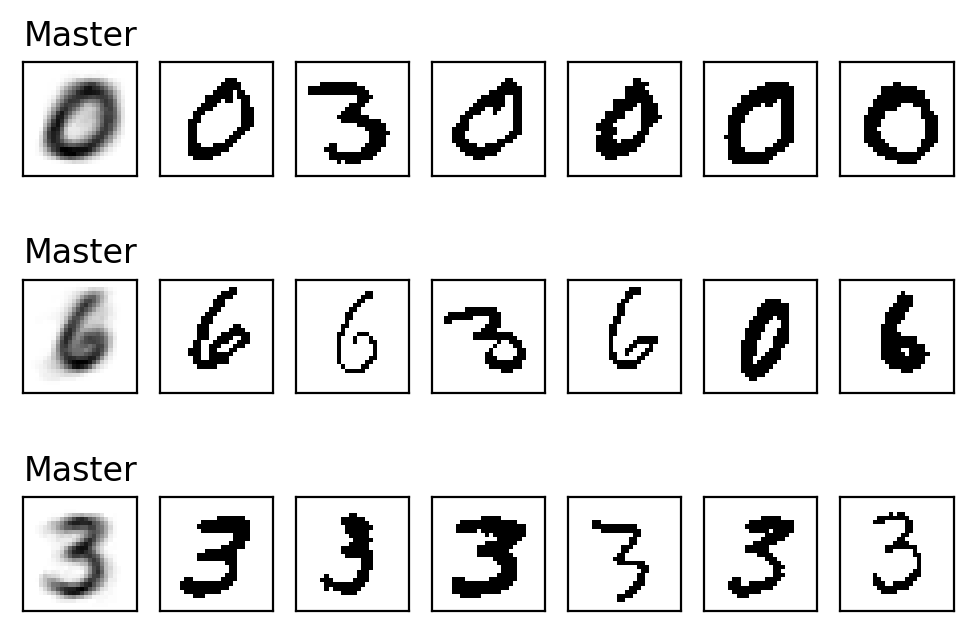

In [5]:
# Main
if __name__ == '__main__':
    # トレーニングセットの読み込み
    df = pd.read_csv('./input/sample-images.txt', sep=",", header=None)
    data_num = len(df)

    # 初期パラメータの設定
    mix = [1.0/K] * K
    mu = (rand(28*28*K)*0.5+0.25).reshape(K, 28*28)
    for k in range(K):
        mu[k] /= mu[k].sum()

    fig = plt.figure(figsize=(15, 6))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.rcParams['font.family'] = 'DejaVu Sans'
    for k in range(K):
        subplot = fig.add_subplot(K, N+1, k*(N+1)+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
#     fig.show()

    # N回のIterationを実施
    for iter_num in range(N):
        print("iter_num %d" % iter_num)

        # E phase
        resp = DataFrame()
        for index, line in df.iterrows():
            tmp = []
            for k in range(K):
                a = mix[k] * bern(line, mu[k])
                if a == 0:
                    tmp.append(0.0)
                else:
                    s = 0.0
                    for kk in range(K):
                        s += mix[kk] * bern(line, mu[kk])
                    tmp.append(a/s)
            resp = resp.append([tmp], ignore_index=True)

        # M phase
        mu = np.zeros((K, 28*28))
        for k in range(K):
            nk = resp[k].sum()
            mix[k] = nk/data_num
            for index, line in df.iterrows():
                mu[k] += line * resp[k][index]
            mu[k] /= nk

            subplot = fig.add_subplot(K, N+1, k*(N+1)+(iter_num+1)+1)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
#         plt.pause(1)
    plt.show()

    # トレーニングセットの文字を分類
    cls = []
    for index, line in resp.iterrows():
        cls.append(np.argmax(line[0:]))

    # 分類結果の表示
    show_figure(mu, cls)